In [109]:
import pandas as pd  
df = pd.read_csv('../Datasets/churn/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

#### Vizualing Data

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [112]:
df['Geography'].nunique()

3

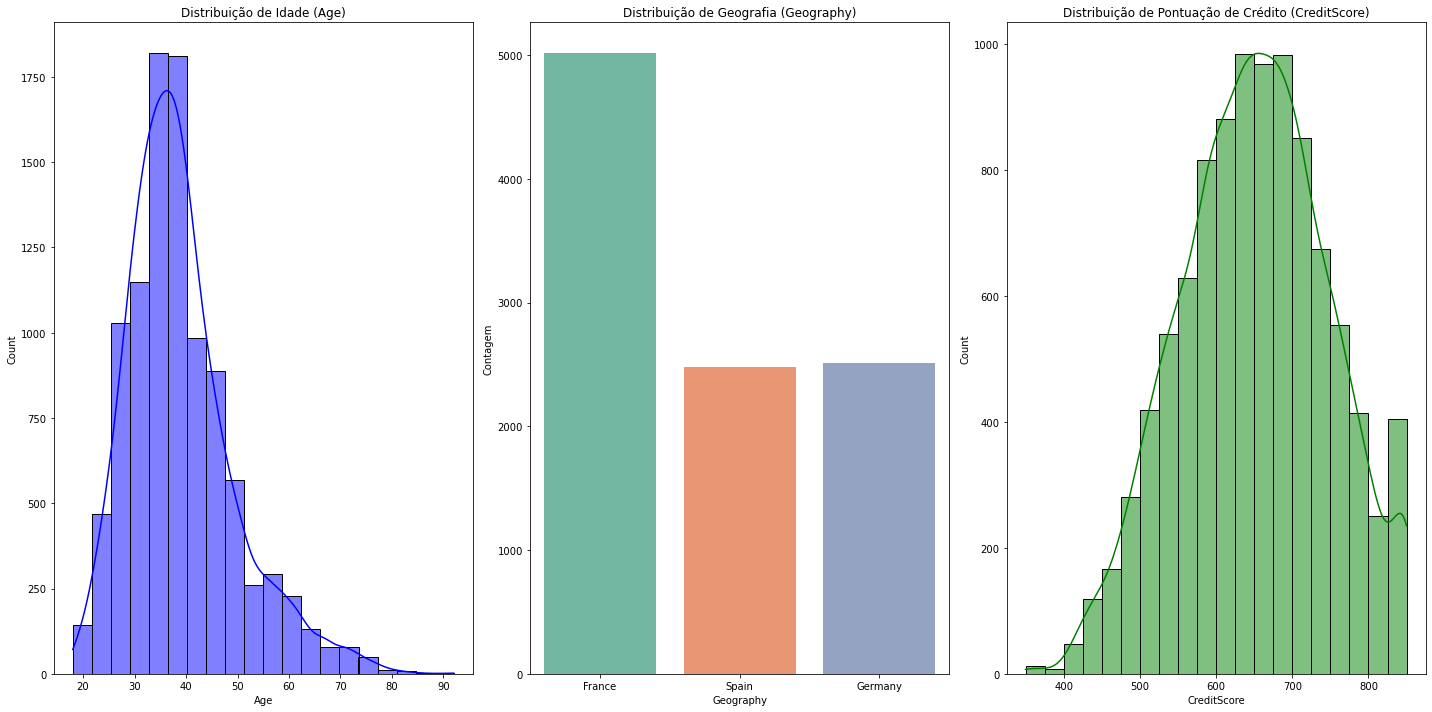

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir o tamanho da figura
plt.figure(figsize=(20, 10))

# Gráfico de distribuição da variável 'Age' (Histograma)
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribuição de Idade (Age)')
plt.xlabel('Age')

# Gráfico de barras para a variável 'Geography'
plt.subplot(1, 3, 2)
sns.countplot(x='Geography', data=df, palette='Set2')
plt.title('Distribuição de Geografia (Geography)')
plt.xlabel('Geography')
plt.ylabel('Contagem')

# Gráfico de distribuição da variável 'CreditScore' (Histograma)
plt.subplot(1, 3, 3)
sns.histplot(df['CreditScore'], bins=20, kde=True, color='green')
plt.title('Distribuição de Pontuação de Crédito (CreditScore)')
plt.xlabel('CreditScore')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

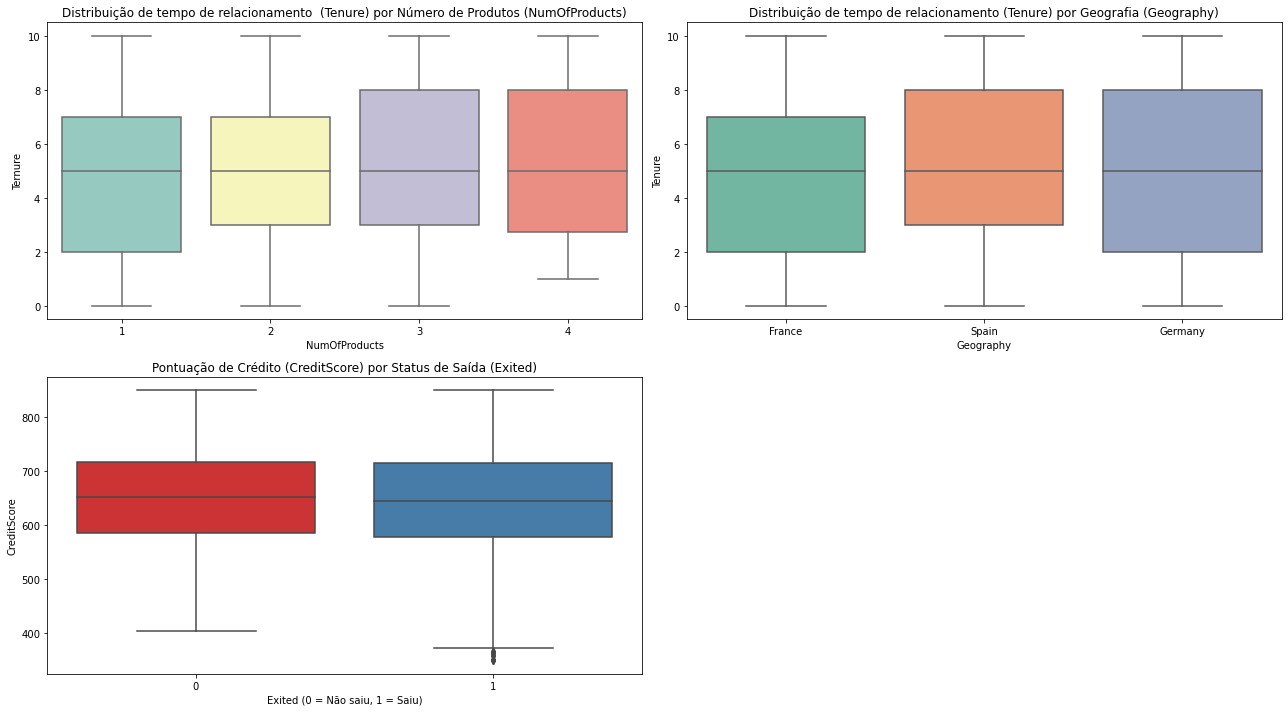

In [114]:
# Definir o tamanho da figura
plt.figure(figsize=(18, 10))

# Boxplot 1: Distribuição do saldo em relação ao número de produtos
plt.subplot(2, 2, 1)
sns.boxplot(x='NumOfProducts', y='Tenure', data=df, palette='Set3')
plt.title('Distribuição de tempo de relacionamento  (Tenure) por Número de Produtos (NumOfProducts)')
plt.xlabel('NumOfProducts')
plt.ylabel('Ternure')

# Boxplot 2: Distribuição da idade em relação à geografia
plt.subplot(2, 2, 2)
sns.boxplot(x='Geography', y='Tenure', data=df, palette='Set2')
plt.title('Distribuição de tempo de relacionamento (Tenure) por Geografia (Geography)')
plt.xlabel('Geography')
plt.ylabel('Tenure')

# Boxplot 3: Distribuição da pontuação de crédito em relação ao status de saída
plt.subplot(2, 2, 3)
sns.boxplot(x='Exited', y='CreditScore', data=df, palette='Set1')
plt.title('Pontuação de Crédito (CreditScore) por Status de Saída (Exited)')
plt.xlabel('Exited (0 = Não saiu, 1 = Saiu)')
plt.ylabel('CreditScore')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

### Encoding Categorical Data

In [115]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the data into training and test sets

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [118]:
print(X_train)

[[1.0 0.0 0.0 ... 1 1 179093.26]
 [0.0 1.0 0.0 ... 1 1 195978.86]
 [0.0 0.0 1.0 ... 1 0 85891.02]
 ...
 [1.0 0.0 0.0 ... 0 0 92220.12]
 [1.0 0.0 0.0 ... 1 0 97508.04]
 [0.0 1.0 0.0 ... 1 1 53581.14]]


In [119]:
print(y_train)

[0 0 1 ... 1 1 0]


#### Scale the features

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [121]:
print(X_train)

[[ 1.00150113 -0.57946723 -0.57638802 ...  0.64920267  0.97481699
   1.36766974]
 [-0.99850112  1.72572313 -0.57638802 ...  0.64920267  0.97481699
   1.6612541 ]
 [-0.99850112 -0.57946723  1.73494238 ...  0.64920267 -1.02583358
  -0.25280688]
 ...
 [ 1.00150113 -0.57946723 -0.57638802 ... -1.54035103 -1.02583358
  -0.1427649 ]
 [ 1.00150113 -0.57946723 -0.57638802 ...  0.64920267 -1.02583358
  -0.05082558]
 [-0.99850112  1.72572313 -0.57638802 ...  0.64920267  0.97481699
  -0.81456811]]


In [122]:
print(X_test)

[[-0.99850112  1.72572313 -0.57638802 ... -1.54035103 -1.02583358
  -1.01960511]
 [ 1.00150113 -0.57946723 -0.57638802 ...  0.64920267  0.97481699
   0.79888291]
 [-0.99850112 -0.57946723  1.73494238 ...  0.64920267 -1.02583358
  -0.72797953]
 ...
 [ 1.00150113 -0.57946723 -0.57638802 ...  0.64920267 -1.02583358
  -1.16591585]
 [ 1.00150113 -0.57946723 -0.57638802 ...  0.64920267 -1.02583358
  -0.41163463]
 [-0.99850112  1.72572313 -0.57638802 ...  0.64920267  0.97481699
   0.12593183]]


### Models

Random Forest Classifier tuned

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier()

rf_random_search = RandomizedSearchCV(estimator=rf, 
                                      param_distributions=param_grid, 
                                      n_iter=100,  # número de combinações aleatórias
                                      cv=3,  # número de folds para validação cruzada
                                      verbose=2, 
                                      random_state=42, 
                                      n_jobs=-1)

rf_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [124]:
y_pred_rf = rf_random_search.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
accuracy_score(y_test, y_pred_rf)

[[1548   59]
 [ 212  181]]


0.8645

#### SVM

In [126]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', degree=4, random_state = 42)
classifier.fit(X_train, y_train)

SVC(degree=4, kernel='poly', random_state=42)

In [127]:
y_pred_svm = classifier.predict(X_test)


In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
accuracy_score(y_test, y_pred_svm)

[[1553   54]
 [ 229  164]]


0.8585

#### Artificial Neural Network 

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

def build_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid'),

    ])
    return model
input_shape = (X_train.shape[1], )
model = build_model(input_shape)

In [130]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200


200/200 [==============================] - 6s 9ms/step - loss: 0.5488 - accuracy: 0.7494 - val_loss: 0.4396 - val_accuracy: 0.8062
Epoch 2/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4767 - accuracy: 0.7944 - val_loss: 0.4226 - val_accuracy: 0.8125
Epoch 3/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4654 - accuracy: 0.7997 - val_loss: 0.4169 - val_accuracy: 0.8231
Epoch 4/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4500 - accuracy: 0.8047 - val_loss: 0.4109 - val_accuracy: 0.8269
Epoch 5/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4344 - accuracy: 0.8138 - val_loss: 0.4017 - val_accuracy: 0.8350
Epoch 6/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4273 - accuracy: 0.8159 - val_loss: 0.3934 - val_accuracy: 0.8406
Epoch 7/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4243 - accuracy: 0.8247 - val_loss: 0.3855 - val_accuracy: 0.8462
Epoch 8/200

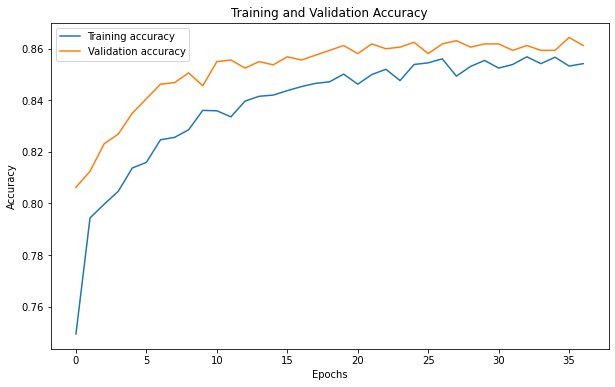

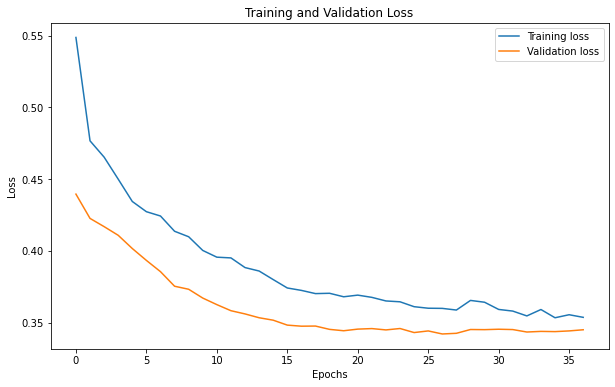

In [132]:
def plot_history(history, metric):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[metric], label=f'Training {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.legend()
    plt.show()


plot_history(history, 'accuracy')
plot_history(history, 'loss')

In [134]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss:  {loss:.4f}')
print(f'Test Accuracy:  {accuracy:.4f}')

63/63 [==============================] - 0s 5ms/step - loss: 0.3379 - accuracy: 0.8585
Test Loss:  0.3379
Test Accuracy:  0.8585
